## **Introduction to Image Processing**

Mojdeh Rastgoo - Desire Sidibe

## 3. Interpolation and Blending

 Importing necessary libraries/modules and functions

In [5]:
% matplotlib inline
% pprint off


# Import the library as show images, plot, etc.
import matplotlib.pyplot as plt
# Import functionality for the color map
import matplotlib.cm as cm

# Import system specific parameters and function
import sys 

## Other plotting libraries
# import seaborn as sns

# Import the library to mange the matrix and array 
import numpy as np

# Importing image processing toolbox 
## Module to read, write,... 
from skimage import io
## Module to convert the image on 8 bits
from skimage import img_as_ubyte
## Module to convert the image to float
from skimage import img_as_float
## Module for color conversion 
from skimage import color
## Module image transform from skimage for resize 
from skimage import transform
## Module misc from scipy for resize 
from scipy import misc
## Module util from skimage 
from PIL import Image


Pretty printing has been turned ON


### 3.1  Resizing an image size using different interpolation functions

** Q.1 Resize the `lena` or `vibot` image using nearest, bilinear and bicubic function.** 

You can define your function which accept the model and resize size from the user or just run a script.

222

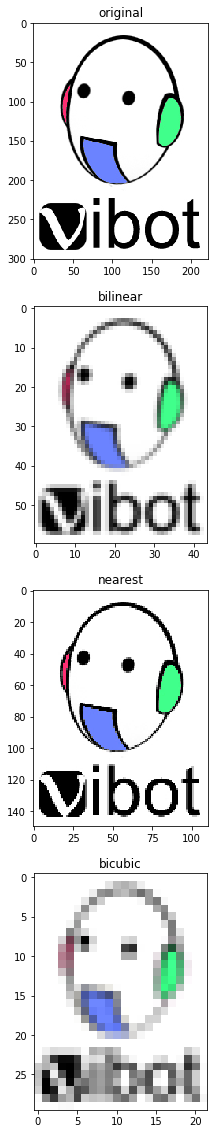

In [6]:

vibot_im = io.imread('images/vibot-color.jpg')

vibot_resized_bilinear = misc.imresize(vibot_im, 20 , 'bilinear')
vibot_resized_nearest = misc.imresize(vibot_im, 50 , 'nearest')
vibot_resized_bicubic = misc.imresize(vibot_im, 10, 'bicubic')


fig , axis = plt.subplots(4,1, figsize = (20,20))

axis[3].imshow(vibot_resized_bicubic)
axis[3].set_title('bicubic')

axis[2].imshow(vibot_resized_nearest)
axis[2].set_title('nearest')


axis[1].imshow(vibot_resized_bilinear)
axis[1].set_title('bilinear')

axis[0].imshow(vibot_im)
axis[0].set_title('original')

vibot_im[0].__len__()

**Q.2 Write three functions that performs `simple_blend`, `alpha_blend` and `pyramid_blend`**

** Using your functions, blend `orange` and `apple` images together.**


In [7]:
def simple_blend(image1, image2):
#     if(image1.shape != image2.shape):
#     image1 = misc.imresize(image1, np.shape(image2), 'bilinear')
    blended_img = image1 #np.zeros(image1.shape)
    row, col = image1.shape
    mid = int(round(col/2))
    blended_img [:, mid:-1]  = image2[:, mid:-1]
    
#     blended_img [:, 0:mid]  = image1[:, 0:mid]
        
    
    return blended_img

def alpha_blend(image1, image2):
    if(image1.shape != image2.shape):
        image1 = misc.imresize(image1, np.shape(image2), 'bilinear')
        
    blended_img = image1 #np.zeros(image1.shape)
    row, col = image1.shape
    
    mid = int(round(col/2))
    win = 20
    x1 = int(np.ceil(col/2)- win)
    x2 = int(np.ceil(col/2)+ win)
    x =  np.arange(x1,x2)
    alpha = (x-x2)/(x1-x2)   #2*wind instead of x2-x1
    
    blended_img [:, x1:x2]  = alpha * image1[:, x1:x2] + (1-alpha) * image2 [:, x1:x2]
#   blended_img [:, mid+1:mid+11] = .95* image2 [:, mid+1:mid+11]
    
    blended_img [:,x2:-1] = image2[:,x2:-1]
    
    return blended_img



def pyramid_blend(image1, image2):
    mask  = np.zeros(image1.shape)
    win = 10
    row, col = mask.shape
    mask[:,1:col//2 -win] = 1
    x1 = int(col//2 - win)
    x2 = int(col//2 + win)
    x= np.arange(x1,x2)
    mask [:, x1 : x2 ] = (x - x2)/( x1 - x2)
    
#     mask_gaussian = list(transform.pyramid_gaussian(mask))
    image1_laplacian = list( transform.pyramid_laplacian(image1))
    
    image2_laplacian = list(transform.pyramid_laplacian(image2))


    blended = []
    for i in range(len(image1_laplacian)):
        temp1 = image1_laplacian[i] * transform.resize(mask, image1_laplacian[i].shape)
        temp2 = image2_laplacian[i] * (1 - transform.resize(mask,image1_laplacian[i].shape))
        
        blended.append( temp1 + temp2  )
    
    
    restored = blended[len(blended)-1]
    
    for i in range(len(blended)-1, 0, -1):
        restored = transform.resize(restored, blended[i-1].shape) + blended[i-1]
        
            
    return restored

E:\ProgramData\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


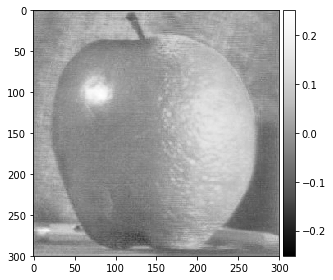

In [10]:
orange_grey = io.imread('images/orange.jpeg', as_grey = True)
apple_grey = io.imread('images/apple.jpeg', as_grey = True)

blended_fruits = pyramid_blend(img_as_float(apple_grey), img_as_float(orange_grey))

io.imshow(blended_fruits, cmap = cm.Greys_r)


# length = len(blended_fruits)

# fig, axis = plt.subplots(length,1, figsize =  (20,20))

# for i in range(length):
#     axis[i].imshow(blended_fruits[i])



